In [ ]:
pip install odfpy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 717.0/717.0 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for odfpy: filename=odfpy-1.4.1-py2.py3-none-any.whl size=160672 sha256=0cb8a99a99b50d5f917deea21d7bcc941265693b126d37e05a85992823fe613e
  Stored in directory: /root/.cache/pip/wheels/c8/2e/95/90d94fe33903786937f3b8c33dd88807f792359c6424b40469
Successfully built odfpy


      AT      V       AP     RH      PE
0  14.96  41.76  1024.07  73.17  463.26
1  25.18  62.96  1020.04  59.08  444.37
2   5.11  39.40  1012.16  92.14  488.56
3  20.86  57.32  1010.24  76.64  446.48
4  10.82  37.50  1009.23  96.62  473.90
                AT            V           AP           RH           PE
count  9568.000000  9568.000000  9568.000000  9568.000000  9568.000000
mean     19.651231    54.305804  1013.259078    73.308978   454.365009
std       7.452473    12.707893     5.938784    14.600269    17.066995
min       1.810000    25.360000   992.890000    25.560000   420.260000
25%      13.510000    41.740000  1009.100000    63.327500   439.750000
50%      20.345000    52.080000  1012.940000    74.975000   451.550000
75%      25.720000    66.540000  1017.260000    84.830000   468.430000
max      37.110000    81.560000  1033.300000   100.160000   495.760000


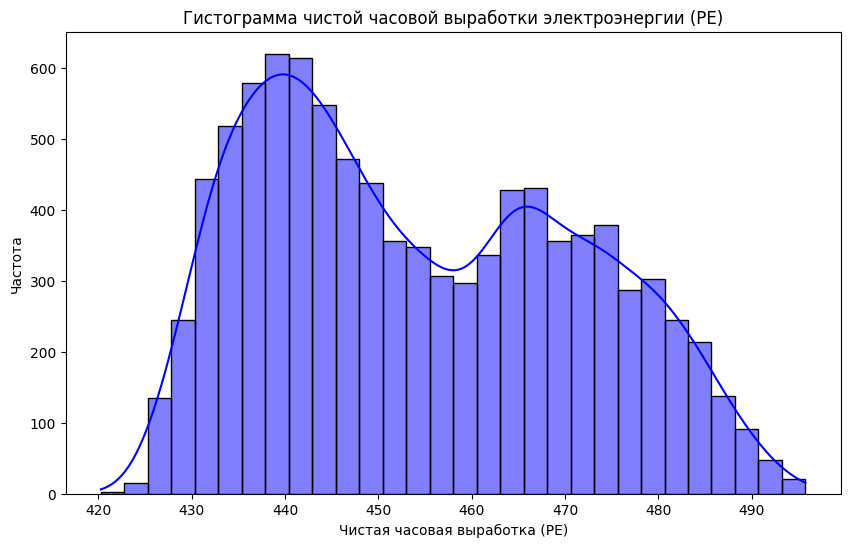

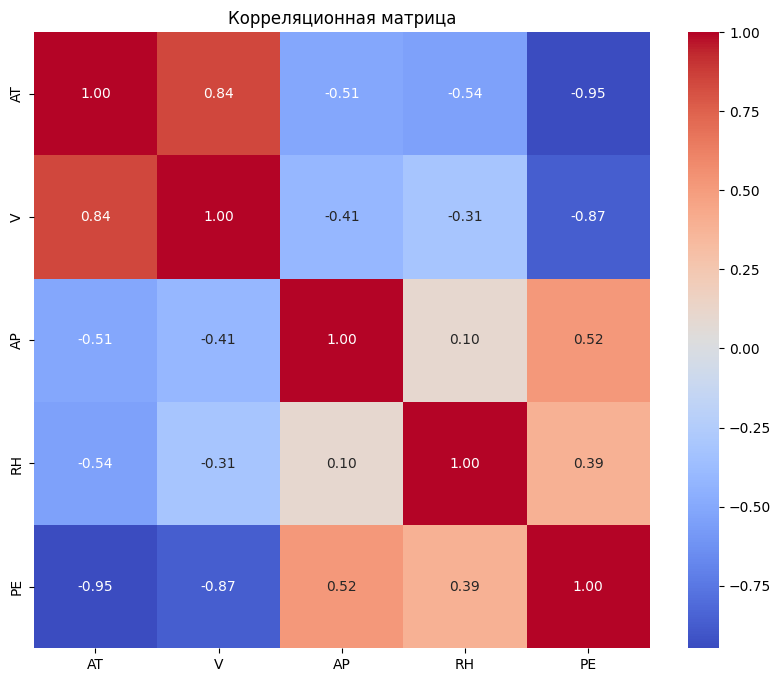

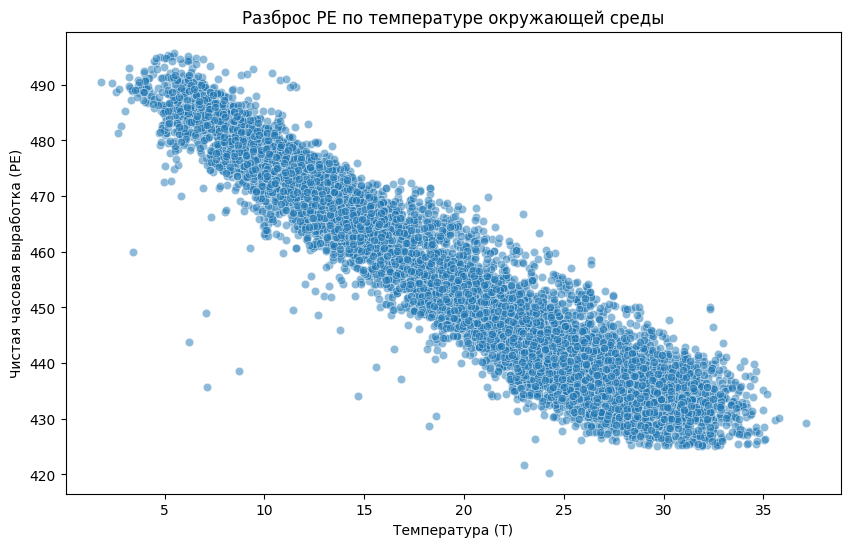

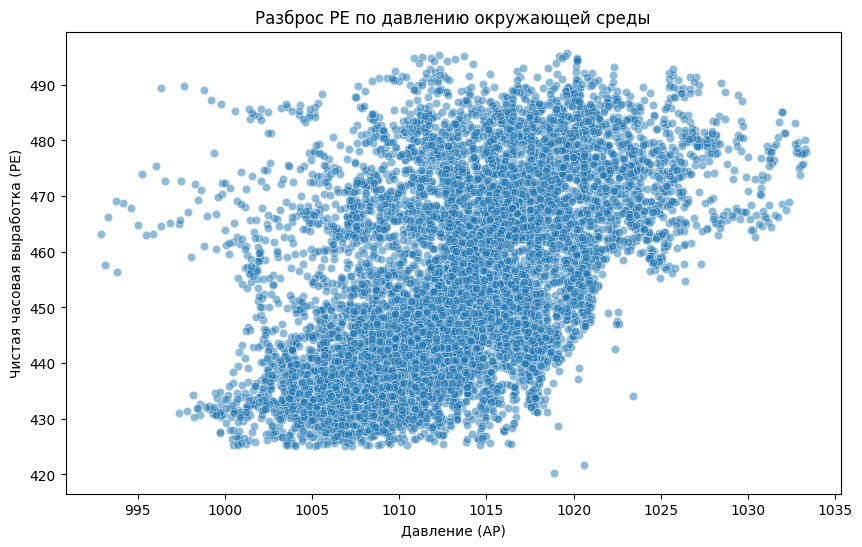

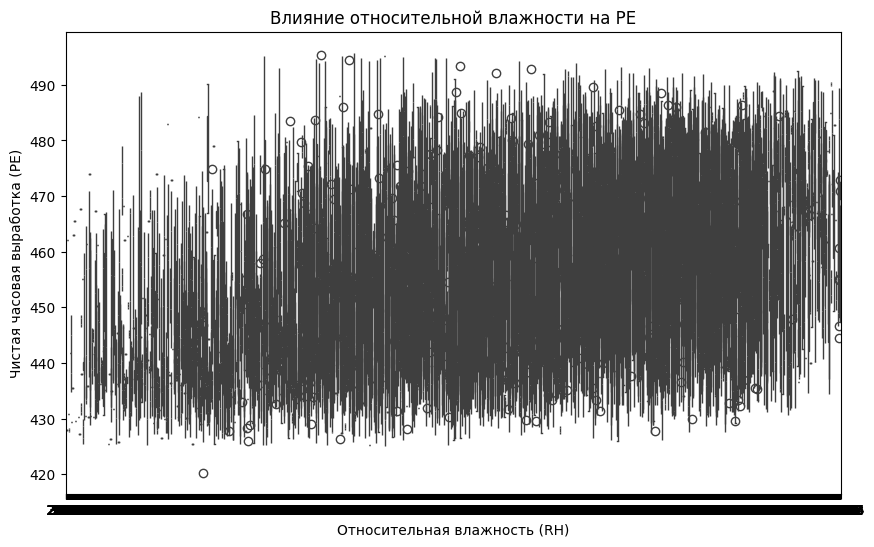

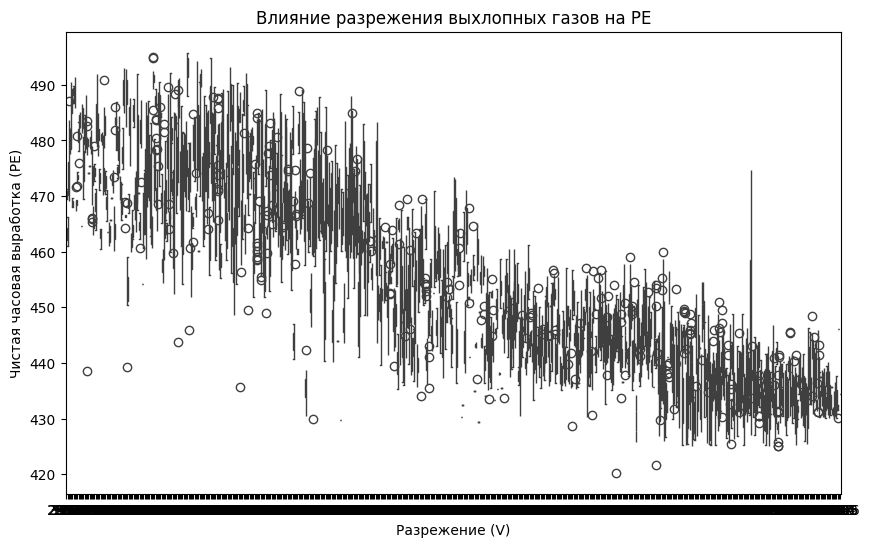

<ipython-input-3-fa98383f7a29>:61: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_PE_by_temp = data.groupby(temperature_bins)['PE'].mean().reset_index()
<ipython-input-3-fa98383f7a29>:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_PE_by_temp['AT'].astype(str), y=avg_PE_by_temp['PE'], palette='viridis')


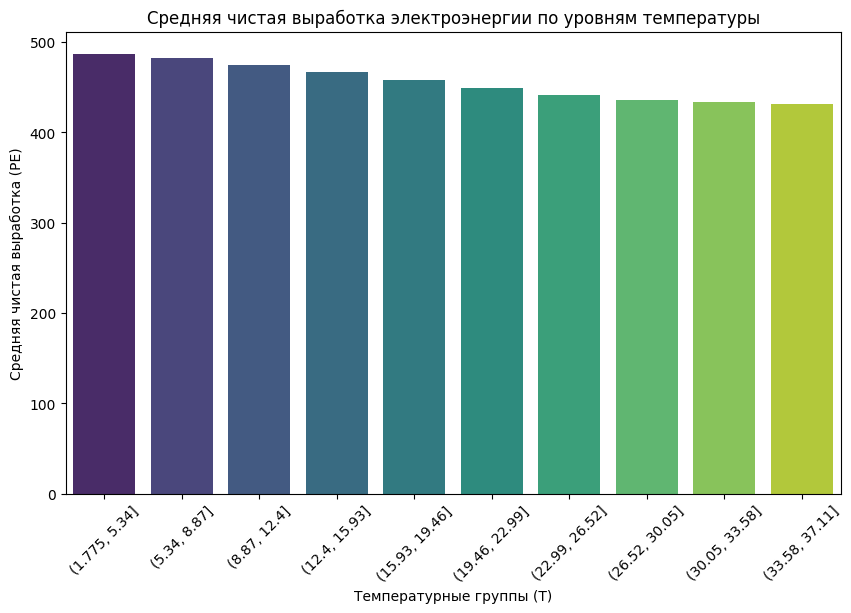

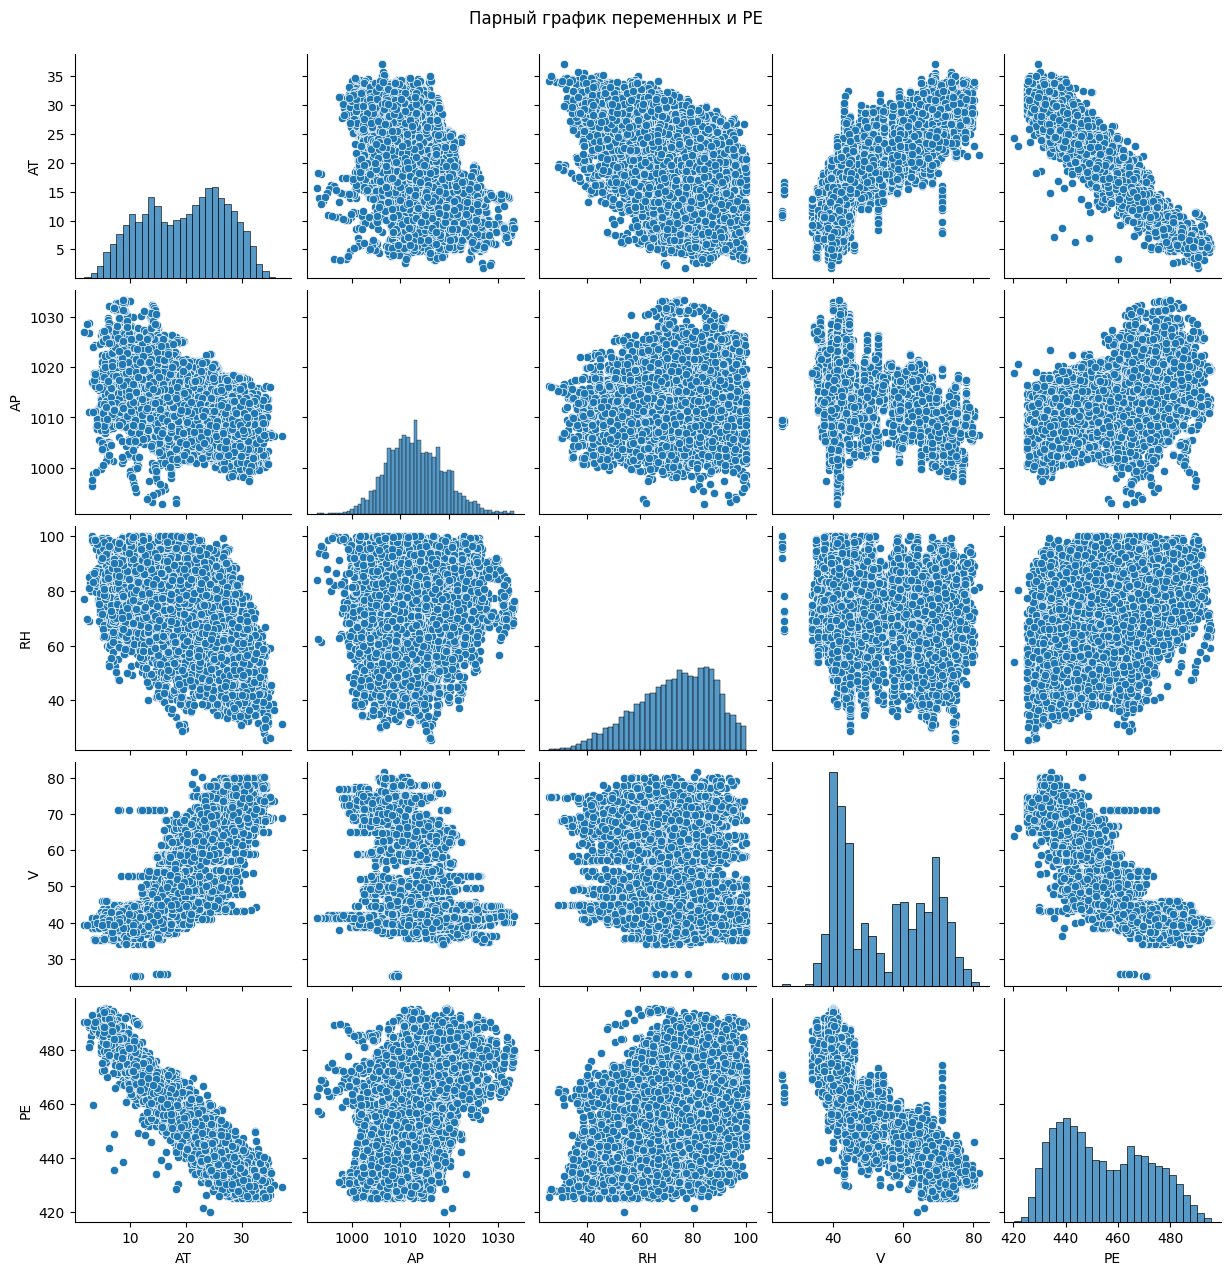

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
data = pd.read_excel('Folds5x2_pp.ods', engine='odf')
print(data.head())
print(data.describe())

# 1. Гистограмма чистой часовой выработки электроэнергии
plt.figure(figsize=(10, 6))
sns.histplot(data['PE'], bins=30, kde=True, color='blue')
plt.title('Гистограмма чистой часовой выработки электроэнергии (PE)')
plt.xlabel('Чистая часовая выработка (PE)')
plt.ylabel('Частота')
plt.show()

# 2. Корреляционная матрица
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Корреляционная матрица')
plt.show()

# 3. Разброс PE по температуре
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AT', y='PE', data=data, alpha=0.5)
plt.title('Разброс PE по температуре окружающей среды')
plt.xlabel('Температура (T)')
plt.ylabel('Чистая часовая выработка (PE)')
plt.show()

# 4. Разброс PE по давлению
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AP', y='PE', data=data, alpha=0.5)
plt.title('Разброс PE по давлению окружающей среды')
plt.xlabel('Давление (AP)')
plt.ylabel('Чистая часовая выработка (PE)')
plt.show()

# 5. Влияние относительной влажности на PE
plt.figure(figsize=(10, 6))
sns.boxplot(x='RH', y='PE', data=data)
plt.title('Влияние относительной влажности на PE')
plt.xlabel('Относительная влажность (RH)')
plt.ylabel('Чистая часовая выработка (PE)')
plt.show()

# 6. Влияние разрежения на PE
plt.figure(figsize=(10, 6))
sns.boxplot(x='V', y='PE', data=data)
plt.title('Влияние разрежения выхлопных газов на PE')
plt.xlabel('Разрежение (V)')
plt.ylabel('Чистая часовая выработка (PE)')
plt.show()

# 7. Средняя выработка электроэнергии по уровням температуры
temperature_bins = pd.cut(data['AT'], bins=10)
avg_PE_by_temp = data.groupby(temperature_bins)['PE'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_PE_by_temp['AT'].astype(str), y=avg_PE_by_temp['PE'], palette='viridis')
plt.title('Средняя чистая выработка электроэнергии по уровням температуры')
plt.xlabel('Температурные группы (T)')
plt.ylabel('Средняя чистая выработка (PE)')
plt.xticks(rotation=45)
plt.show()

# 8. Парный график для анализа всех переменных
sns.pairplot(data[['AT', 'AP', 'RH', 'V', 'PE']])
plt.suptitle('Парный график переменных и PE', y=1.02)
plt.show()

1. Посмотрев на корреляционную матрицу, можем заметить, что у нас присутствует  существенная зависимость следовательно данные хорошо детерминируют таргет
2. Поскольку у нас сильная корреляция и антикорреляция, то простые модели будет работать довольно хорошо
3. На основе матрицы можем заметить, что PE не зависит от RH

Риски и их решения


*   Возможно представлены не все факторы от которых зависит выроботка электроэнергии(например количество аварий и их влияние на мощность)
*   Датасет содержит данные только для одного типа электростанций и будет сответственно не актуален для других
*   Возможно стоит учитывать и временной период этого датасета т.к. улучшение аппаратуры так же влияет на мощность электростанции







# Подготовка данных




In [8]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
data = data.dropna()

X = data[['AT', 'AP', 'RH', 'V']]
y = data['PE']


# Нормализация
scaler = StandardScaler()
X = scaler.fit_transform(X)



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Размер обучающего набора:", X_train.shape, y_train.shape)
print("Размер тестового набора:", X_test.shape, y_test.shape)

Размер обучающего набора: (7654, 4) (7654,)
Размер тестового набора: (1914, 4) (1914,)


Mean Squared Error: 14.662147479688228
R-squared: 0.9494509770626904


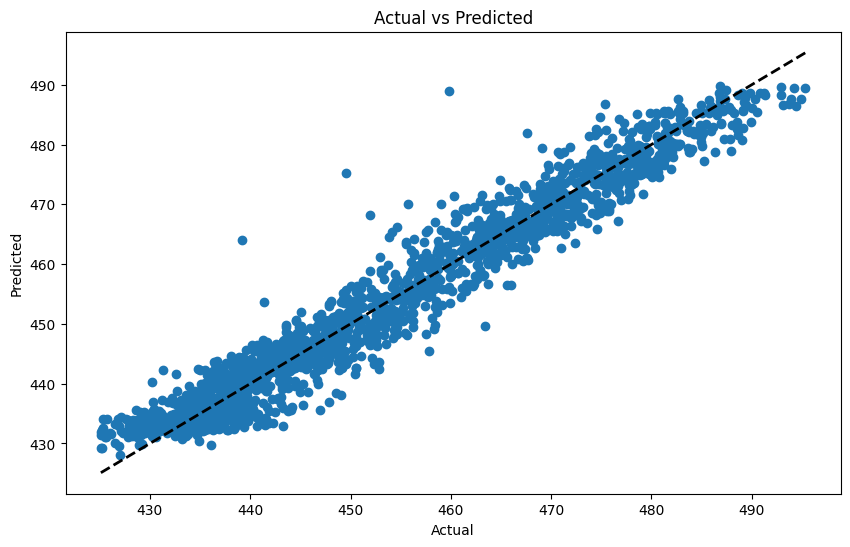

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Обучение модели GradientBoostingRegressor
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
# Предсказание на тестовом наборе
y_pred = model.predict(X_test)

# Расчет метрик
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Отрисовка графика сравнения предсказанных значений и реальных значений
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()


Гипотезы
  * На основе анализа, мы можем заметить, что данные очень простые и возможно справилась бы и ленейная регрессия
  * Изменив базовые параметры мы получим более точные результаты


In [14]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Сравнение точности моделей
print('Mean Squared Error GradientBoosting:', mse)
print('Mean Squared Error Linear Regression:', mse_lr)
print("GradientBoosting R-squared:", r2)
print("Linear Regression R-squared:", r2_lr)

Mean Squared Error GradientBoosting: 14.662147479688228
Mean Squared Error Linear Regression: 20.27370599968744
GradientBoosting R-squared: 0.9494509770626904
Linear Regression R-squared: 0.9301046431962188


      Actual  GB_Predicted  LR_Predicted
2513  455.27    455.226126    455.680208
9411  436.31    436.476871    438.732122
8745  440.68    432.913263    434.164440
9085  434.40    435.880885    438.769546
4950  482.06    478.722749    479.888329
2755  436.07    437.412485    439.499474
563   452.48    448.609675    448.840102
5834  435.22    434.345794    434.809190
6850  432.93    434.150251    435.097364
4359  466.46    472.186991    472.947629


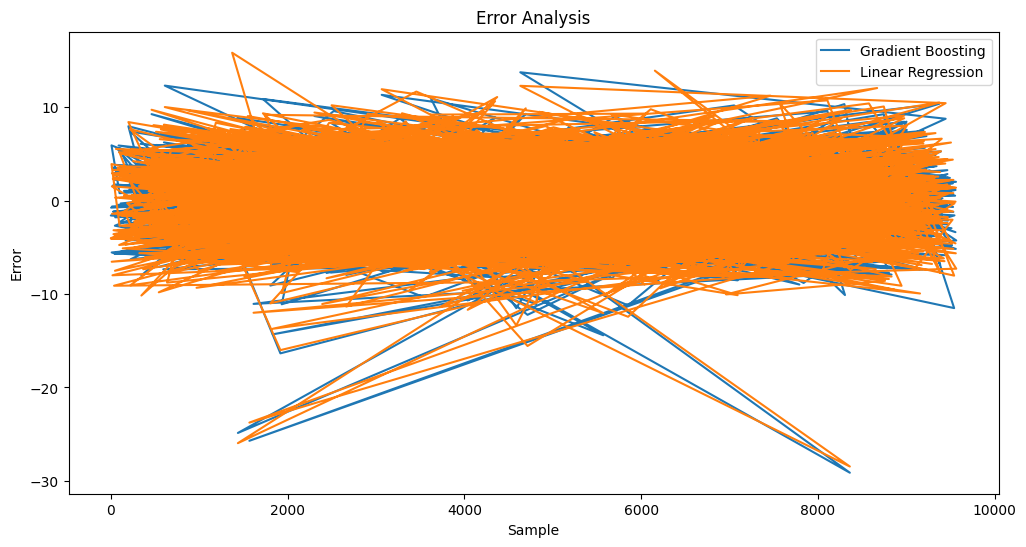

In [23]:
# Сравнение
results = pd.DataFrame({'Actual': y_test, 'GB_Predicted': y_pred, 'LR_Predicted': y_pred_lr})
print(results.head(10)) # Первые 10 строк для примера

plt.figure(figsize=(12, 6))
plt.plot(y_test - y_pred, label="Gradient Boosting")
plt.plot(y_test - y_pred_lr, label="Linear Regression")
plt.xlabel("Sample")
plt.ylabel("Error")
plt.title("Error Analysis")
plt.legend()
plt.show()


Mean Squared Error: 13.732583757617288
R-squared: 0.9526557284794763


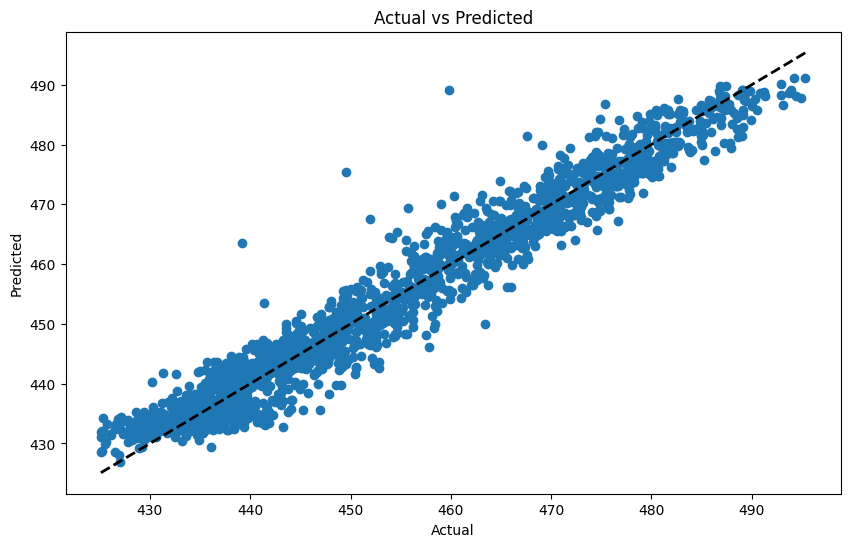

In [20]:
# Обучение модели GradientBoostingRegressor
tuned_model = GradientBoostingRegressor(n_estimators=150, learning_rate=0.1, max_depth=3, min_samples_split=2, min_samples_leaf=1, random_state=42)
tuned_model.fit(X_train, y_train)

tuned_model_y_pred = tuned_model.predict(X_test)

tuned_model_y_pred_mse = mean_squared_error(y_test, tuned_model_y_pred)
tuned_model_y_pred_r2 = r2_score(y_test, tuned_model_y_pred)

print(f'Mean Squared Error: {tuned_model_y_pred_mse}')
print(f'R-squared: {tuned_model_y_pred_r2}')


# Отрисовка графика сравнения предсказанных значений и реальных значений
plt.figure(figsize=(10, 6))
plt.scatter(y_test, tuned_model_y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()